## Choice for Heavier Grading on Data Processing or Data Analysis

We feel that the notebook should be graded more towards **Data Analysis** because our project is completely based on what information we have right now and how can we use that to predict something that is going to happen next. Data Processing while being an important part of our project , does not involve a lot of data cleaning. The data for the stock prices tends to be very clean generally and we have had to process the data a lot adding new columns , merging datasets etc. But our project demands for a far more emphasis and effort on the analysis part including creating visualizations, demanding industry knowledge, etc. So we feel our project should be heavily graded for **Data Analysis**

## Code Implementation
Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
#from google.colab import drive
#drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



We have used datasets of three companies: **Tesla**, **Ford** and **General Motors**. 
The dataset gives the description of the stock prices for each of the companies

### Tesla - ###

In [ ]:
path = ''
Tesla_stock_data = pd.read_csv(path+'Tesla.csv')  #loading the dataset
Tesla_stock_data.head() #displaying the first five stock results of the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-06,37.104000,37.316002,36.535999,37.169998,37.169998,16958000
1,2016-12-07,37.230000,38.680000,37.000000,38.630001,38.630001,27309500
2,2016-12-08,38.410000,38.500000,37.908001,38.458000,38.458000,15970500
3,2016-12-09,38.174000,38.768002,38.161999,38.436001,38.436001,13612500
4,2016-12-12,38.560001,38.883999,38.236000,38.486000,38.486000,12194500


### Ford - ###

In [ ]:
Ford_stock_data = pd.read_csv(path + 'Ford.csv') #loading the dataset
Ford_stock_data.head() #displaying the first five stock results of the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-06,12.40,12.59,12.37,12.56,10.180296,23923900
1,2016-12-07,12.59,13.15,12.54,13.06,10.585564,58600400
2,2016-12-08,13.07,13.15,12.97,13.03,10.561246,41459500
3,2016-12-09,13.00,13.20,12.91,13.17,10.674722,45256100
4,2016-12-12,13.08,13.10,12.81,12.82,10.391034,39596800


### GM - ###

In [ ]:
GM_stock_data = pd.read_csv(path + 'GM.csv') #loading the dataset
GM_stock_data.head() #displaying the first five stock results of the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-06,35.090000,35.160000,34.910000,35.070000,30.675413,11867800
1,2016-12-07,35.180000,36.540001,35.090000,36.299999,31.751274,26622400
2,2016-12-08,36.189999,36.459999,36.040001,36.419998,31.856239,14516000
3,2016-12-09,36.410000,37.680000,36.410000,37.660000,32.940865,26434200
4,2016-12-12,37.509998,37.740002,37.009998,37.099998,32.451027,15575200


Usually the stock price datsets are clean and free from the NULL values but to cross verify we have checked if there is any missing value present in the any of the three daatasets

In [ ]:
Tesla_stock_data.isnull().sum()  #using isnull function to check the Null values and getting count of the null values for each column

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
Ford_stock_data.isnull().sum() #using isnull function to check the Null values and getting count of the null values for each column

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
GM_stock_data.isnull().sum() #using isnull function to check the Null values and getting count of the null values for each column

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Since all the columns contains numeric values we need to check whether it's data type is in float or integer form, because data type being in float and integer format will help in future calculations.

In [ ]:
print(f'Data type for columns present in Tesla stock dataset: {Tesla_stock_data.dtypes}')
print(f'Data type for columns present in General Motors stock dataset: {GM_stock_data.dtypes}')
print(f'Data type for columns present in Ford stock dataset: {Ford_stock_data.dtypes}')

Data type for columns present in Tesla stock dataset: Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Data type for columns present in General Motors stock dataset: Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Data type for columns present in Ford stock dataset: Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


There are three different datasets but so in order to merge them together to get a single dataframe we need to check whether the number of rows are consistent or not. This is done by using shape method which will return a tuple representing dimension of a numpy array

In [ ]:
print(Tesla_stock_data.shape)   #to get the dimension of the dataframe
print(GM_stock_data.shape)
print(Ford_stock_data.shape)

(1258, 7)
(1258, 7)
(1258, 7)


## Add more columns ##
### Add `Moving Average` information for each dataset ###

Moving Average is the average of n days' close price. Here, we want to know the 5, 20, 60 days' average close price of each stock data. In addition, n days moving average can be written as nMA. For example: `5MA` means the average close price of last 5 days. Therefore, we calculate the `5MA`, `20MA` and `60MA` and add is as a new columns.

### Tesla - ###

Here, we use a `.rolling()` function to calculate the Close price data for the past n days.
- `'window = n'` means that we are using the past n days data to each rows.

In [ ]:
Tesla_stock_data['5MA'] = Tesla_stock_data.loc[:,'Close'].rolling(window=5).mean() #We want to know the moving average of 5 days, thus, we use 'mean()' to get the average price
Tesla_stock_data['20MA'] = Tesla_stock_data.loc[:,'Close'].rolling(window=20).mean()#We want to know the moving average of 20 days, thus, we use 'mean()' to get the average price
Tesla_stock_data['60MA'] = Tesla_stock_data.loc[:,'Close'].rolling(window=60).mean()#We want to know the moving average of 60 days, thus, we use 'mean()' to get the average price
Tesla_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,5MA,20MA,60MA
0,2016-12-06,37.104000,37.316002,36.535999,37.169998,37.169998,16958000,NaN,NaN,NaN
1,2016-12-07,37.230000,38.680000,37.000000,38.630001,38.630001,27309500,NaN,NaN,NaN
2,2016-12-08,38.410000,38.500000,37.908001,38.458000,38.458000,15970500,NaN,NaN,NaN
3,2016-12-09,38.174000,38.768002,38.161999,38.436001,38.436001,13612500,NaN,NaN,NaN
4,2016-12-12,38.560001,38.883999,38.236000,38.486000,38.486000,12194500,38.236000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500,1120.162012,1119.457501,920.016667
1254,2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000,1117.740015,1116.266003,926.869833
1255,2021-12-01,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800,1114.934009,1112.416003,932.571167
1256,2021-12-02,1099.060059,1113.000000,1056.650024,1084.599976,1084.599976,24371600,1108.654004,1105.953003,938.083333


Because moving average is calculate base on the historical data, the first few days of the dataset would be `NaN` and will be remove for later analysis.

### GM - ###

In [ ]:
GM_stock_data['5MA'] = GM_stock_data.loc[:,'Close'].rolling(window=5).mean()
GM_stock_data['20MA'] = GM_stock_data.loc[:,'Close'].rolling(window=20).mean()
GM_stock_data['60MA'] = GM_stock_data.loc[:,'Close'].rolling(window=60).mean()
GM_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,5MA,20MA,60MA
0,2016-12-06,35.090000,35.160000,34.910000,35.070000,30.675413,11867800,NaN,NaN,NaN
1,2016-12-07,35.180000,36.540001,35.090000,36.299999,31.751274,26622400,NaN,NaN,NaN
2,2016-12-08,36.189999,36.459999,36.040001,36.419998,31.856239,14516000,NaN,NaN,NaN
3,2016-12-09,36.410000,37.680000,36.410000,37.660000,32.940865,26434200,NaN,NaN,NaN
4,2016-12-12,37.509998,37.740002,37.009998,37.099998,32.451027,15575200,36.509999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-29,61.110001,61.540001,59.650002,59.860001,59.860001,15033100,61.865999,60.5300,56.053333
1254,2021-11-30,59.200001,59.840000,57.439999,57.869999,57.869999,21282200,60.627999,60.6490,56.204166
1255,2021-12-01,59.250000,60.590000,58.009998,58.060001,58.060001,26353700,59.630000,60.7725,56.359833
1256,2021-12-02,58.750000,61.299999,58.700001,61.020000,61.020000,25365100,59.396000,61.0235,56.560666


### Ford - ###

In [ ]:
Ford_stock_data['5MA'] = Ford_stock_data.loc[:,'Close'].rolling(window=5).mean()
Ford_stock_data['20MA'] = Ford_stock_data.loc[:,'Close'].rolling(window=20).mean()
Ford_stock_data['60MA'] = Ford_stock_data.loc[:,'Close'].rolling(window=60).mean()
Ford_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,5MA,20MA,60MA
0,2016-12-06,12.400000,12.590000,12.370000,12.560000,10.180296,23923900,NaN,NaN,NaN
1,2016-12-07,12.590000,13.150000,12.540000,13.060000,10.585564,58600400,NaN,NaN,NaN
2,2016-12-08,13.070000,13.150000,12.970000,13.030000,10.561246,41459500,NaN,NaN,NaN
3,2016-12-09,13.000000,13.200000,12.910000,13.170000,10.674722,45256100,NaN,NaN,NaN
4,2016-12-12,13.080000,13.100000,12.810000,12.820000,10.391034,39596800,12.928,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-29,20.070000,20.190001,19.490000,19.670000,19.670000,68778700,20.070,19.5445,16.167000
1254,2021-11-30,19.620001,19.950001,19.030001,19.190001,19.190001,103238400,19.812,19.6065,16.272000
1255,2021-12-01,19.629999,20.469999,19.530001,19.580000,19.580000,125295600,19.688,19.6850,16.382500
1256,2021-12-02,19.500000,20.110001,19.280001,19.870001,19.870001,94142300,19.612,19.7470,16.496500


### Add `Exponential Moving Average(EMA)` information for each dataset ###

EMA is a type of moving average that places a greater weight on the recently data points. It weighted moving average more to recent price changes. Now, we want to know the 50-day and 200-day EMA.

#### The formula for EMA ####

`today's EMA = (today's close price * multiplier) + (yesterday's EMA * (1 - multiplier))`

***Note:*** multiplier = smoothing / (1 + day period)

***Note:*** smoothing is the measure of how much weight we want to emphasis on the recent price. Here, we set the smoothing factor to 2.

#### Define a function to calculate EMA ####

The function will take two input which is the dataframe and the number of days for calculaing the EMA. The return value will be a list of EMA data.

When calculating the EMA, we need to know the `simple moving average(SMA)` of the first n days. The `SMA` is the first n days average close price.

In [ ]:
def calculate_EMA(df, nDays):
    smoothing = 2 # we set the smoothing factor to 2
    multiplier = smoothing / (1 + nDays) 
    nRows = len(df)
    
    # minus 1 because the index of the data starts from 0
    SMA = df.loc[:(nDays - 1),'Close'].mean() 
    
    # create a list to store the EMA
    EMA_list = []
    
    for i in range(0, nRows):
        if i < nDays: # the first n days will not have EMA
            EMA_list.append(np.nan)
        elif i == nDays: # the nth day EMA will be the nth day SMA
            EMA_list.append(SMA)
        else: # apply the formula here
            EMA_list.append((df.loc[i,'Close'] * multiplier) + EMA_list[-1] * (1 - multiplier))
    
    return EMA_list

### 50-day EMA ###



In [ ]:
num_of_days = 50 # set the number of days we are using for calculate EMA
Tesla_stock_data['50EMA'] = pd.Series(calculate_EMA(Tesla_stock_data, num_of_days))
GM_stock_data['50EMA'] = pd.Series(calculate_EMA(GM_stock_data, num_of_days))
Ford_stock_data['50EMA'] = pd.Series(calculate_EMA(Ford_stock_data, num_of_days))

### 200-day EMA ###



In [ ]:
num_of_days = 200 # set the number of days we are using for calculate EMA
Tesla_stock_data['200EMA'] = pd.Series(calculate_EMA(Tesla_stock_data, num_of_days))
GM_stock_data['200EMA'] = pd.Series(calculate_EMA(GM_stock_data, num_of_days))
Ford_stock_data['200EMA'] = pd.Series(calculate_EMA(Ford_stock_data, num_of_days))

### Add `%_Change` information for each dataset ###

We want to know the price change percentage in each days, so we use the `.pct_change function` to calculate the pertange change of the close price.

`%_Change` is one of the very important things for financial analysis and is the basis for all of the trading strategies and calculations.

In [ ]:
Tesla_stock_data['%_Change'] = Tesla_stock_data.loc[:, 'Close'].pct_change()
GM_stock_data['%_Change'] = GM_stock_data.loc[:, 'Close'].pct_change()
Ford_stock_data['%_Change'] = Ford_stock_data.loc[:, 'Close'].pct_change()

In [ ]:
Tesla_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,5MA,20MA,60MA,50EMA,200EMA,%_Change
0,2016-12-06,37.104000,37.316002,36.535999,37.169998,37.169998,16958000,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-12-07,37.230000,38.680000,37.000000,38.630001,38.630001,27309500,NaN,NaN,NaN,NaN,NaN,0.039279
2,2016-12-08,38.410000,38.500000,37.908001,38.458000,38.458000,15970500,NaN,NaN,NaN,NaN,NaN,-0.004453
3,2016-12-09,38.174000,38.768002,38.161999,38.436001,38.436001,13612500,NaN,NaN,NaN,NaN,NaN,-0.000572
4,2016-12-12,38.560001,38.883999,38.236000,38.486000,38.486000,12194500,38.236000,NaN,NaN,NaN,NaN,0.001301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500,1120.162012,1119.457501,920.016667,984.766519,770.248200,0.050900
1254,2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000,1117.740015,1116.266003,926.869833,991.040773,773.974686,0.006834
1255,2021-12-01,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800,1114.934009,1112.416003,932.571167,995.117606,777.168968,-0.043468
1256,2021-12-02,1099.060059,1113.000000,1056.650024,1084.599976,1084.599976,24371600,1108.654004,1105.953003,938.083333,998.626718,780.227983,-0.009498


In [ ]:
Tesla_stock_data.rename(columns={'Open':'Tesla Open','High':'Tesla High','Low':'Tesla Low','Close':'Tesla Close','Adj Close':'Tesla Adj Close','Volume':'Tesla Volume',
                                 '5MA':'Tesla 5MA','20MA':'Tesla 20MA','60MA':'Tesla 60MA','50EMA':'Tesla 50EMA','200EMA':'Tesla 200EMA','%_Change':'Tesla %_Change'},inplace=True)
GM_stock_data.rename(columns={'Open':'GM Open','High':'GM High','Low':'GM Low','Close':'GM Close','Adj Close':'GM Adj Close','Volume':'GM Volume',
                              '5MA':'GM 5MA','20MA':'GM 20MA','60MA':'GM 60MA','50EMA':'GM 50EMA','200EMA':'GM 200EMA','%_Change':'GM %_Change'},inplace=True)
Ford_stock_data.rename(columns={'Open':'Ford Open','High':'Ford High','Low':'Ford Low','Close':'Ford Close','Adj Close':'Ford Adj Close','Volume':'Ford Volume',
                                '5MA':'Ford 5MA','20MA':'Ford 20MA','60MA':'Ford 60MA','50EMA':'Ford 50EMA','200EMA':'Ford 200EMA','%_Change':'Ford %_Change'},inplace=True)

In [ ]:
GM_stock_data.drop(['Date'],axis = 1,inplace=True)

In [ ]:
Ford_stock_data.drop(['Date'],axis = 1,inplace = True)

In [ ]:
merge1 = pd.concat([Tesla_stock_data,GM_stock_data],axis=1)

In [ ]:
merge1.head()

,Date,Tesla Open,Tesla High,Tesla Low,Tesla Close,Tesla Adj Close,Tesla Volume,Tesla 5MA,Tesla 20MA,Tesla 60MA,Tesla 50EMA,Tesla 200EMA,Tesla %_Change,GM Open,GM High,GM Low,GM Close,GM Adj Close,GM Volume,GM 5MA,GM 20MA,GM 60MA,GM 50EMA,GM 200EMA,GM %_Change
0,2016-12-06,37.104000,37.316002,36.535999,37.169998,37.169998,16958000,NaN,NaN,NaN,NaN,NaN,NaN,35.090000,35.160000,34.910000,35.070000,30.675413,11867800,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-12-07,37.230000,38.680000,37.000000,38.630001,38.630001,27309500,NaN,NaN,NaN,NaN,NaN,0.039279,35.180000,36.540001,35.090000,36.299999,31.751274,26622400,NaN,NaN,NaN,NaN,NaN,0.035073
2,2016-12-08,38.410000,38.500000,37.908001,38.458000,38.458000,15970500,NaN,NaN,NaN,NaN,NaN,-0.004453,36.189999,36.459999,36.040001,36.419998,31.856239,14516000,NaN,NaN,NaN,NaN,NaN,0.003306
3,2016-12-09,38.174000,38.768002,38.161999,38.436001,38.436001,13612500,NaN,NaN,NaN,NaN,NaN,-0.000572,36.410000,37.680000,36.410000,37.660000,32.940865,26434200,NaN,NaN,NaN,NaN,NaN,0.034047
4,2016-12-12,38.560001,38.883999,38.236000,38.486000,38.486000,12194500,38.236,NaN,NaN,NaN,NaN,0.001301,37.509998,37.740002,37.009998,37.099998,32.451027,15575200,36.509999,NaN,NaN,NaN,NaN,-0.014870


In [ ]:
stock_data = pd.concat([merge1,Ford_stock_data],axis=1)
stock_data

,Date,Tesla Open,Tesla High,Tesla Low,Tesla Close,Tesla Adj Close,Tesla Volume,Tesla 5MA,Tesla 20MA,Tesla 60MA,Tesla 50EMA,Tesla 200EMA,Tesla %_Change,GM Open,GM High,GM Low,GM Close,GM Adj Close,GM Volume,GM 5MA,GM 20MA,GM 60MA,GM 50EMA,GM 200EMA,GM %_Change,Ford Open,Ford High,Ford Low,Ford Close,Ford Adj Close,Ford Volume,Ford 5MA,Ford 20MA,Ford 60MA,Ford 50EMA,Ford 200EMA,Ford %_Change
0,2016-12-06,37.104000,37.316002,36.535999,37.169998,37.169998,16958000,NaN,NaN,NaN,NaN,NaN,NaN,35.090000,35.160000,34.910000,35.070000,30.675413,11867800,NaN,NaN,NaN,NaN,NaN,NaN,12.400000,12.590000,12.370000,12.560000,10.180296,23923900,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-12-07,37.230000,38.680000,37.000000,38.630001,38.630001,27309500,NaN,NaN,NaN,NaN,NaN,0.039279,35.180000,36.540001,35.090000,36.299999,31.751274,26622400,NaN,NaN,NaN,NaN,NaN,0.035073,12.590000,13.150000,12.540000,13.060000,10.585564,58600400,NaN,NaN,NaN,NaN,NaN,0.039809
2,2016-12-08,38.410000,38.500000,37.908001,38.458000,38.458000,15970500,NaN,NaN,NaN,NaN,NaN,-0.004453,36.189999,36.459999,36.040001,36.419998,31.856239,14516000,NaN,NaN,NaN,NaN,NaN,0.003306,13.070000,13.150000,12.970000,13.030000,10.561246,41459500,NaN,NaN,NaN,NaN,NaN,-0.002297
3,2016-12-09,38.174000,38.768002,38.161999,38.436001,38.436001,13612500,NaN,NaN,NaN,NaN,NaN,-0.000572,36.410000,37.680000,36.410000,37.660000,32.940865,26434200,NaN,NaN,NaN,NaN,NaN,0.034047,13.000000,13.200000,12.910000,13.170000,10.674722,45256100,NaN,NaN,NaN,NaN,NaN,0.010744
4,2016-12-12,38.560001,38.883999,38.236000,38.486000,38.486000,12194500,38.236000,NaN,NaN,NaN,NaN,0.001301,37.509998,37.740002,37.009998,37.099998,32.451027,15575200,36.509999,NaN,NaN,NaN,NaN,-0.014870,13.080000,13.100000,12.810000,12.820000,10.391034,39596800,12.928,NaN,NaN,NaN,NaN,-0.026576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500,1120.162012,1119.457501,920.016667,984.766519,770.248200,0.050900,61.110001,61.540001,59.650002,59.860001,59.860001,15033100,61.865999,60.5300,56.053333,58.130273,53.932332,-0.005152,20.070000,20.190001,19.490000,19.670000,19.670000,68778700,20.070,19.5445,16.167000,17.436158,14.184704,-0.004051
1254,2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000,1117.740015,1116.266003,926.869833,991.040773,773.974686,0.006834,59.200001,59.840000,57.439999,57.869999,57.869999,21282200,60.627999,60.6490,56.204166,58.120066,53.971512,-0.033244,19.620001,19.950001,19.030001,19.190001,19.190001,103238400,19.812,19.6065,16.272000,17.504936,14.234508,-0.024403
1255,2021-12-01,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800,1114.934009,1112.416003,932.571167,995.117606,777.168968,-0.043468,59.250000,60.590000,58.009998,58.060001,58.060001,26353700,59.630000,60.7725,56.359833,58.117710,54.012194,0.003283,19.629999,20.469999,19.530001,19.580000,19.580000,125295600,19.688,19.6850,16.382500,17.586311,14.287697,0.020323
1256,2021-12-02,1099.060059,1113.000000,1056.650024,1084.599976,1084.599976,24371600,1108.654004,1105.953003,938.083333,998.626718,780.227983,-0.009498,58.750000,61.299999,58.700001,61.020000,61.020000,25365100,59.396000,61.0235,56.560666,58.231526,54.081923,0.050982,19.500000,20.110001,19.280001,19.870001,19.870001,94142300,19.612,19.7470,16.496500,17.675867,14.343243,0.014811


## Filter out the NaN value in the `200EMA` column ##

We want to get rid of the data with a `NaN` value in the `200EMA` column. Therefore, we use `.notnull()` to get those rows that do not have `NaN`.

Also, we want to reset the index by using `reset_index()` function.

In [ ]:
stock_data = stock_data[stock_data['Tesla 200EMA'].notnull()].reset_index(drop=True)
stock_data

,Date,Tesla Open,Tesla High,Tesla Low,Tesla Close,Tesla Adj Close,Tesla Volume,Tesla 5MA,Tesla 20MA,Tesla 60MA,Tesla 50EMA,Tesla 200EMA,Tesla %_Change,GM Open,GM High,GM Low,GM Close,GM Adj Close,GM Volume,GM 5MA,GM 20MA,GM 60MA,GM 50EMA,GM 200EMA,GM %_Change,Ford Open,Ford High,Ford Low,Ford Close,Ford Adj Close,Ford Volume,Ford 5MA,Ford 20MA,Ford 60MA,Ford 50EMA,Ford 200EMA,Ford %_Change
0,2017-09-22,73.297997,73.980003,70.176003,70.218002,70.218002,40797000,74.063199,71.953800,69.379400,70.679177,59.937970,-0.041994,39.299999,39.540001,39.180000,39.419998,35.580765,12670600,38.938000,37.5485,36.152000,36.627156,35.579800,0.008184,11.740000,11.870000,11.720000,11.840000,10.009714,30196500,11.724,11.3905,11.219500,11.274268,11.698750,0.010239
1,2017-09-25,70.629997,71.494003,68.575996,68.998001,68.998001,38029500,72.462799,71.923200,69.326867,70.613249,60.028120,-0.017374,40.189999,40.639999,40.000000,40.299999,36.375053,21544400,39.279999,37.7835,36.242666,36.771189,35.626767,0.022324,11.880000,12.060000,11.840000,11.940000,10.094253,40766000,11.786,11.4465,11.232333,11.300375,11.701150,0.008446
2,2017-09-26,70.185997,70.248001,68.180000,69.050003,69.050003,35781500,71.268800,71.919100,69.272333,70.551945,60.117890,0.000754,40.330002,40.619999,40.180000,40.259998,36.338951,14256600,39.591999,38.0210,36.331500,36.908005,35.672869,-0.000993,11.950000,12.000000,11.900000,11.930000,10.085799,30646700,11.828,11.5035,11.244667,11.325066,11.703428,-0.000838
3,2017-09-27,69.980003,70.297997,68.099998,68.194000,68.194000,30301500,69.951201,71.855200,69.233500,70.459477,60.198249,-0.012397,40.310001,40.689999,40.160000,40.580002,36.627796,9750700,39.931999,38.2740,36.415000,37.052005,35.721696,0.007948,11.980000,12.020000,11.860000,11.950000,10.102709,28412200,11.876,11.5590,11.251167,11.349574,11.705881,0.001676
4,2017-09-28,67.975998,68.550003,67.080002,67.919998,67.919998,26598000,68.876001,71.719400,69.275200,70.359889,60.275082,-0.004018,40.480000,40.580002,40.369999,40.580002,36.627796,9646200,40.228000,38.5120,36.507833,37.190358,35.770037,0.000000,11.950000,11.990000,11.900000,11.960000,10.111163,23105700,11.924,11.6100,11.262167,11.373512,11.708410,0.000837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500,1120.162012,1119.457501,920.016667,984.766519,770.248200,0.050900,61.110001,61.540001,59.650002,59.860001,59.860001,15033100,61.865999,60.5300,56.053333,58.130273,53.932332,-0.005152,20.070000,20.190001,19.490000,19.670000,19.670000,68778700,20.070,19.5445,16.167000,17.436158,14.184704,-0.004051
1054,2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000,1117.740015,1116.266003,926.869833,991.040773,773.974686,0.006834,59.200001,59.840000,57.439999,57.869999,57.869999,21282200,60.627999,60.6490,56.204166,58.120066,53.971512,-0.033244,19.620001,19.950001,19.030001,19.190001,19.190001,103238400,19.812,19.6065,16.272000,17.504936,14.234508,-0.024403
1055,2021-12-01,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800,1114.934009,1112.416003,932.571167,995.117606,777.168968,-0.043468,59.250000,60.590000,58.009998,58.060001,58.060001,26353700,59.630000,60.7725,56.359833,58.117710,54.012194,0.003283,19.629999,20.469999,19.530001,19.580000,19.580000,125295600,19.688,19.6850,16.382500,17.586311,14.287697,0.020323
1056,2021-12-02,1099.060059,1113.000000,1056.650024,1084.599976,1084.599976,24371600,1108.654004,1105.953003,938.083333,998.626718,780.227983,-0.009498,58.750000,61.299999,58.700001,61.020000,61.020000,25365100,59.396000,61.0235,56.560666,58.231526,54.081923,0.050982,19.500000,20.110001,19.280001,19.870001,19.870001,94142300,19.612,19.7470,16.496500,17.675867,14.343243,0.014811


## Data Analysis

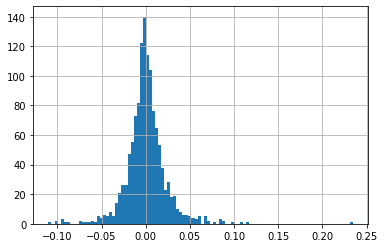

In [ ]:
#binning the Ford dataset and creating a histogram
Ford_stock_data['Ford %_Change'].hist(bins= 100)

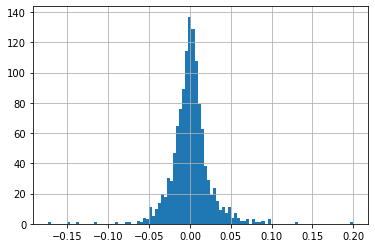

In [ ]:
#binning the GM dataset and creating a histogram
GM_stock_data['GM %_Change'].hist(bins = 100)

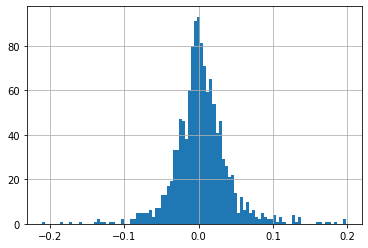

In [ ]:
#binning the Tesla dataset and creating a histogram
Tesla_stock_data['Tesla %_Change'].hist(bins = 100)

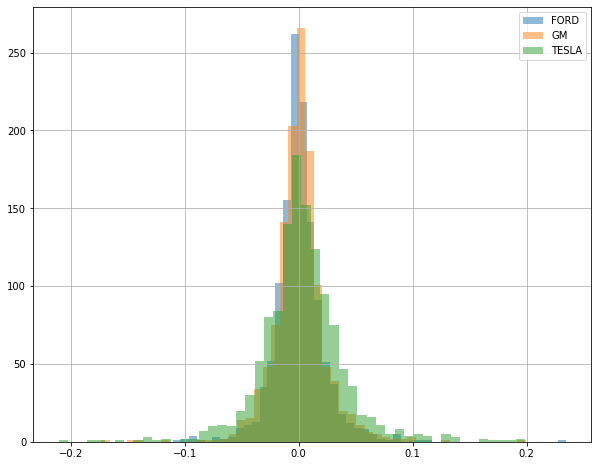

In [ ]:
# Plotting all istograms together for comparision
Ford_stock_data['Ford %_Change'].hist(bins= 50, label = 'FORD',figsize = (10,8), alpha = 0.5)
GM_stock_data['GM %_Change'].hist(bins = 50, label = 'GM',  alpha = 0.5)
Tesla_stock_data['Tesla %_Change'].hist(bins = 50, label = 'TESLA', alpha = 0.5)
plt.legend()

Here, from the histogram we can see that the percentage change in the stock prices for all the stocks from the automobile industry are related to each other still there is quite a difference between them in the percentage returns. If we look at the histogram for tesla we can see a lot of values that are far away from the center, which means that it is more likely to give short term capital gains for trading purposes compated to GM and Ford. But the same goes for the losses as well, we can see that tesla has had a highest drop of more than 20% while the same thing for ford is nearly 11% and for GM is a little more than 15%. So, Tesla ironically inspite of having such a market capitalizaiton, which makes it more difficult to move the price of Tesla by a huge percentage, has a higher volatility compared to Ford and GM. This could be accounted to the fact that Elon Musk uses Twitter a lot and a lot of his tweets have direct impact on the stock price of Tesla only and not all of the stocks in the automobile industry.

In [ ]:
# calculating cumilative returns
Tesla_stock_data['Cumulative Return'] = (1 + Tesla_stock_data['Tesla %_Change']).cumprod()
GM_stock_data['Cumulative Return'] = (1 + GM_stock_data['GM %_Change']).cumprod()
Ford_stock_data['Cumulative Return']= (1 + Ford_stock_data['Ford %_Change']).cumprod()

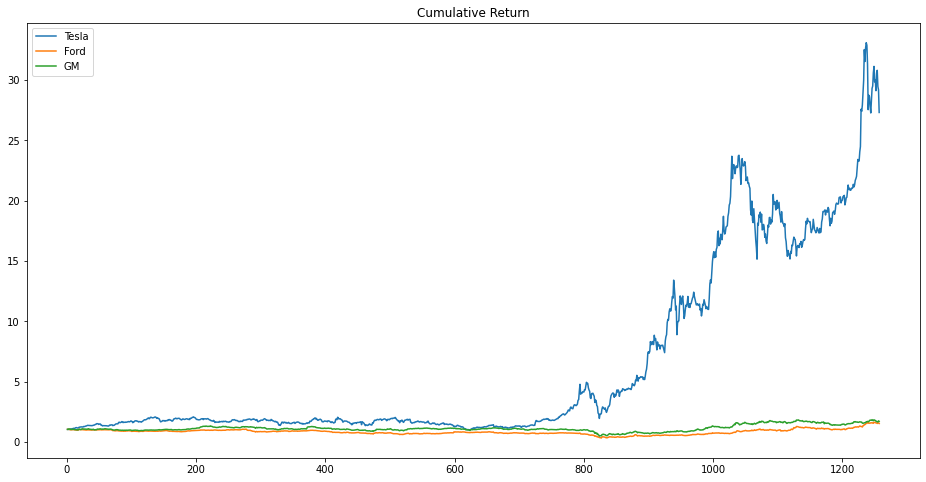

In [ ]:
# Plotting cumilative returns together for comparision 
Tesla_stock_data['Cumulative Return'].plot(label = 'Tesla', figsize=(16,8),title = 'Cumulative Return')
Ford_stock_data['Cumulative Return'].plot(label = 'Ford')
GM_stock_data['Cumulative Return'].plot(label = 'GM')
plt.legend()

Now looking at the cumilative return chart comparision we can see that Tesla is far ahead of the competetion. Infact, at the time of writing this notebook, Tesla is worth over a Trillion dollars which makes it one of the only 5 companies in the world that are a part of the Trillion Club, and it is worth a lot more than GM and Ford combined. So, tesla inspite of being volatile is giving amazingly good returns in the long term. So, being a good stock ticker for trading , at the same time it is also a very good investment pick too compared to GM and Ford. It has been on par with GM and Ford for more than half of the time span. But it has not stopped once it has taken off and GM and Ford returns look astronomically small when compared to Tesla on a bigger time frame. 
The inference that we can make from this is that compounding can work wonders in the stock market, if you are patient enough. If you invested in a company like Tesla and got out of it in the first two years just because you did not see any significant movement then you would never be able to get the returns that it is delivering at its peak right now. 

#### `The AutoRegressive Integrated Moving Average (ARIMA) model`

A famous and widely used forecasting method for time-series prediction is the AutoRegressive Integrated Moving Average (ARIMA) model. ARIMA models are capable of capturing a suite of different standard temporal structures in time-series data.
Terminology
Let’s break down these terms:

##### AR: < Auto Regressive > means that the model uses the dependent relationship between an observation and some predefined number of lagged observations (also known as “time lag” or “lag”).
##### I:< Integrated > means that the model employs differencing of raw observations (e.g. it subtracts an observation from an observation at the previous time step) in order to make the time-series stationary.MA:
##### MA: < Moving Average > means that the model exploits the relationship between the residual error and the observations.

#### Model parameters
The standard ARIMA models expect as input parameters 3 arguments i.e. p,d,q.
##### p is the number of lag observations.
##### d is the degree of differencing.
##### q is the size/width of the moving average window.

* Let’s divide the data into a training (70 % ) and test (30%) set. For this tutorial we select the following ARIMA parameters: p=4, d=1 and q=0.

In [ ]:
# Setting the date as the index or time series plots and graphs
stock_data = stock_data.set_index('Date')

### Tesla

In [ ]:
# training and calculating Mean Squared Error for Tesla
train_data, test_data = Tesla_stock_data[0:int(len(Tesla_stock_data)*0.7)], Tesla_stock_data[int(len(Tesla_stock_data)*0.7):]

training_data = train_data['Tesla Close'].values
test_data = test_data['Tesla Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 638.9245452112492


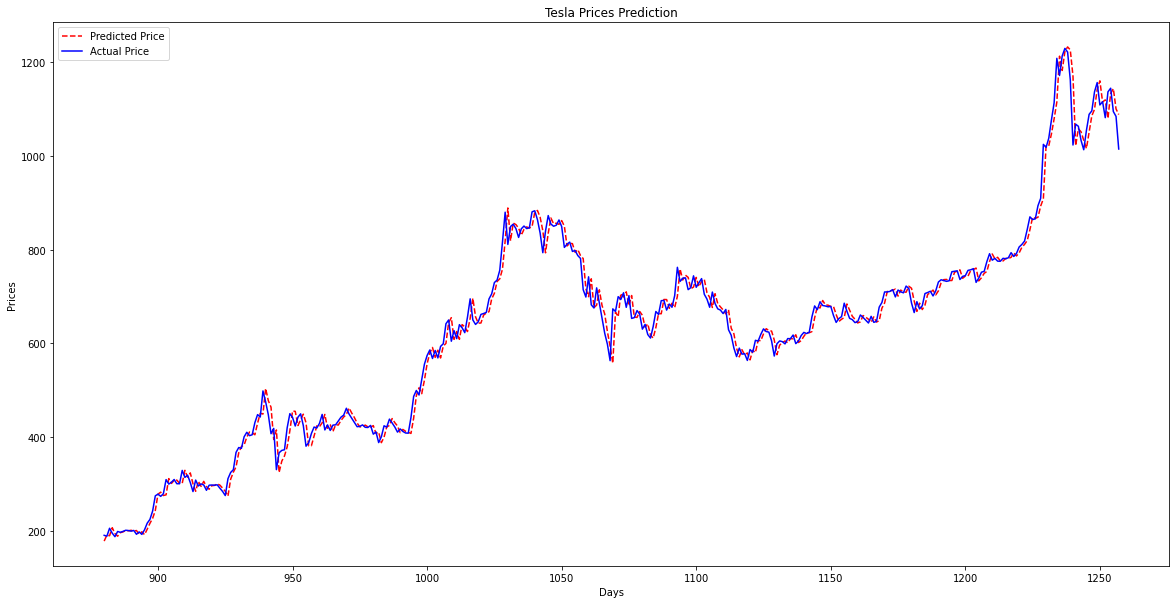

In [ ]:
test_set_range = Tesla_stock_data[int(len(Tesla_stock_data)*0.7):].index
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(test_set_range, model_predictions, color='red', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='blue', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Days')
plt.ylabel('Prices')
#plt.xticks(np.arange(801,1147,100), Ford_stock_data.Date[801:1147:100])
plt.legend()
#plt.figure(figsize = (50,10))
plt.show()

## Ford

In [ ]:
# training and calculating Mean Squared Error for Ford

train_data, test_data = Ford_stock_data[0:int(len(Ford_stock_data)*0.7)], Ford_stock_data[int(len(Ford_stock_data)*0.7):]
training_data = train_data['Ford Close'].values
test_data = test_data['Ford Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))



Testing Mean Squared Error is 0.09254688360465152


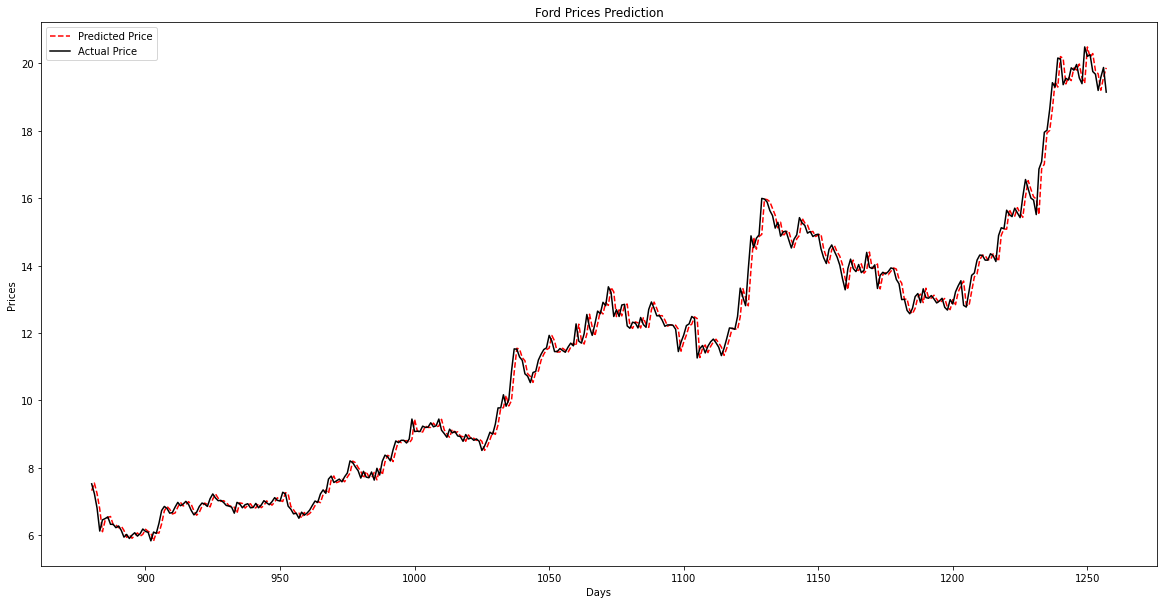

In [ ]:
test_set_range = Ford_stock_data[int(len(Ford_stock_data)*0.7):].index
plt.plot(test_set_range, model_predictions, color='red', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='black', label='Actual Price')
plt.title('Ford Prices Prediction')
plt.xlabel('Days')
plt.ylabel('Prices')
#plt.xticks(np.arange(801,1147,100), Ford_stock_data.Date[801:1147:100])
plt.legend()
#plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## General Motors

In [ ]:
# training and calculating Mean Squared Error for GM


train_data, test_data = GM_stock_data[0:int(len(GM_stock_data)*0.7)], GM_stock_data[int(len(GM_stock_data)*0.7):]
training_data = train_data['GM Close'].values
test_data = test_data['GM Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))



Testing Mean Squared Error is 1.3621126695423416


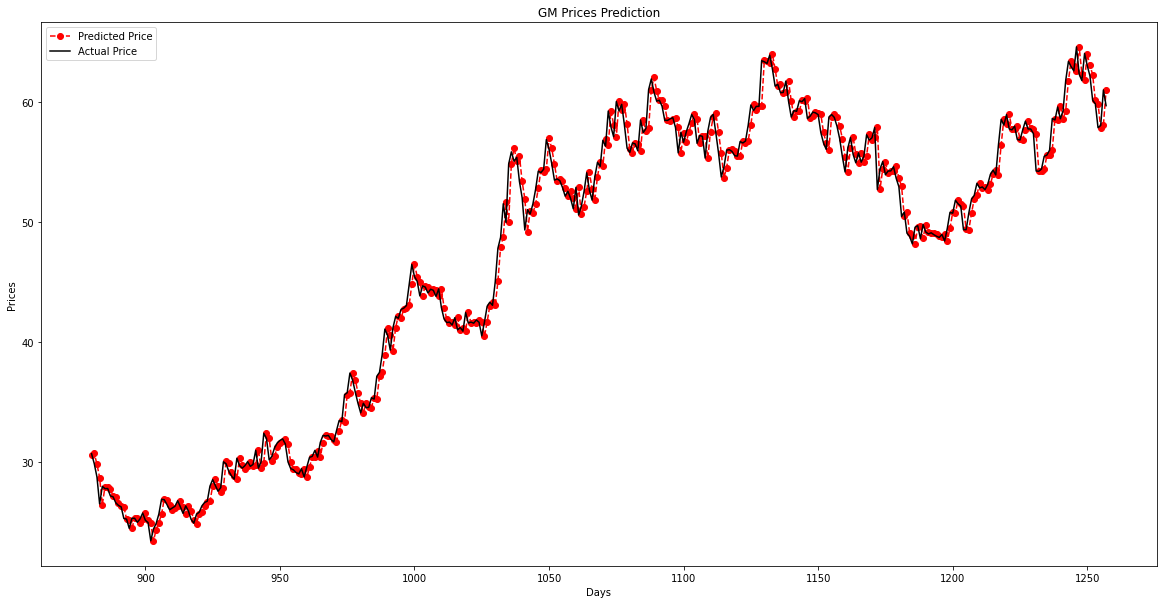

In [ ]:
test_set_range = GM_stock_data[int(len(GM_stock_data)*0.7):].index
plt.plot(test_set_range, model_predictions, color='red',marker="o", linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='black', label='Actual Price')
plt.title('GM Prices Prediction')
plt.xlabel('Days')
plt.ylabel('Prices')
#plt.xticks(np.arange(801,1147,100), GM_stock_data.Date[801:1147:100])
plt.legend()
#plt.rcParams["figure.figsize"] = (20,10)
plt.show()

Here we have used ARIMA model to predict the stock prices for the individual companies based on the previous stock price movements. ARIMA model is widely used in the finance industry to predict stock prices, derivaties like stock options and futures and also housing prices. 

We have split the data as 70% for training the model and 30% for testing out the results of the model. We have trained the model 3 different times for all three stock prices to get accurate results for each company. 

As you can see the model is doing a great job predicting the price , we have a line for the 30% of prices that are actual along with the preductions that the model returns. It is off by just a few points at every price point. The model seemed to be overfitting the data. So, we tried running the model on the other 2 stocks price data and we realized that the model was doing an exceptionally good task at predicting the future prices.

We can also see that the Mean Squared Error for Tesla is exponentially high which again suggests the volatility that it has and that makes if far more difficult to predict the prices for Tesla compated to GM and Ford.

So we predicted future prices with the help of it and tried to come up with realations between those. And so as you can see in this graph also the recent news of omricon has significantly impacted all three stocks which is the same thing that happened back in beginning of 2020 when the virus really started spreading in all parts of the word 

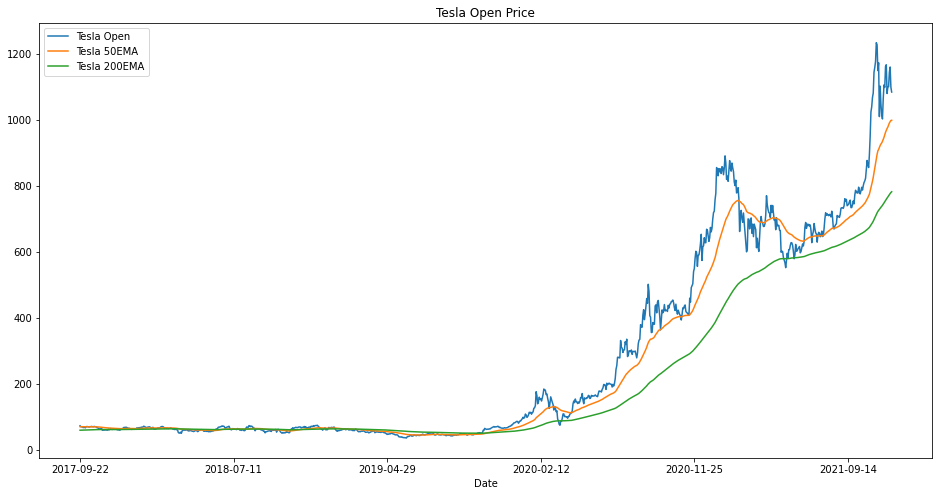

In [ ]:
#Plot based on opening prices
stock_data[['Tesla Open','Tesla 50EMA','Tesla 200EMA']].plot(label = 'Tesla', figsize = (16,8), title = 'Tesla Open Price')
plt.legend();

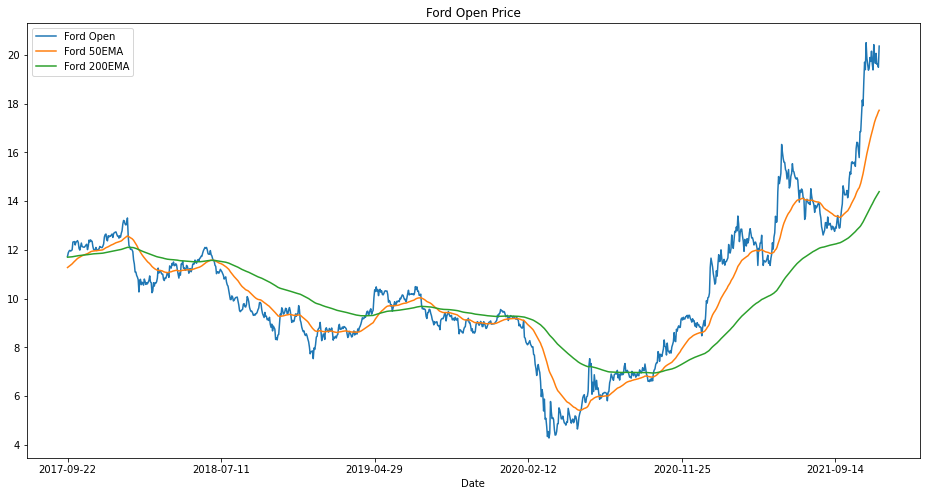

In [ ]:
stock_data[['Ford Open','Ford 50EMA','Ford 200EMA']].plot(label = 'Ford',figsize = (16,8), title = 'Ford Open Price')

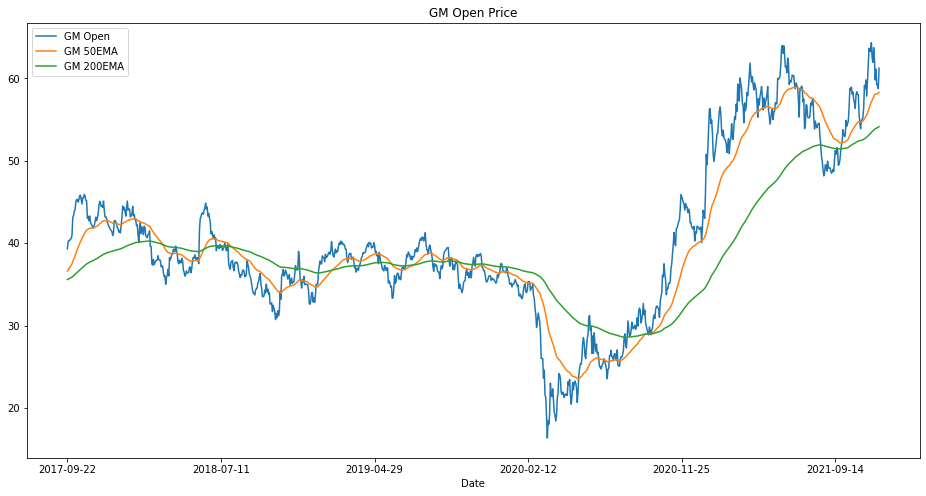

In [ ]:
# Plotting Gm stock prices with exponintial moving averages
stock_data[['GM Open','GM 50EMA','GM 200EMA']].plot(label = 'GM',figsize = (16,8), title = 'GM Open Price')

We can see over here from the prices against the exponential moving averages that the price of Tesla always tends to be above its 200day EMA and almost in compliance with the 50day EMA almost running side to side to the stock price. We can see that whenever the price has come very close to the 50EMA line the stock has barely broken the line, instead it has acted like a sign of reversal most of the times. So, we can say that the 50day EMA is acting like a good support for the Tesla Stock.

While for Ford we can see that the 200EMA is acting like a resistance, the price is barely able to move past that line , it almost does and falls back from that line , which means that it can act as a sell signal when the price of Ford is approaching the 200EMA mark.

So, plotting the prices along with the moving averages seems to be a nice idea for looking for buy and sell indicators for the automobile industry.

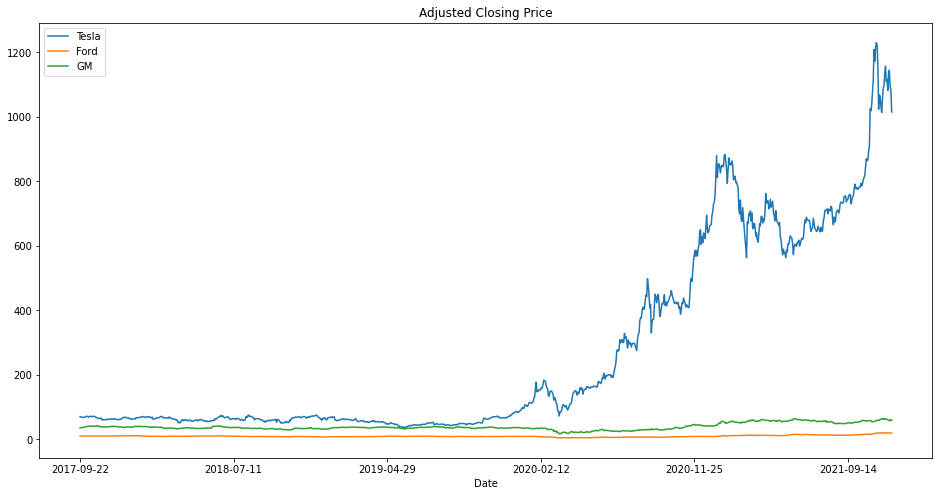

In [ ]:
#Plot based on adjusted closing prices
stock_data['Tesla Adj Close'].plot(label = 'Tesla', figsize = (16,8), title = 'Adjusted Closing Price')
stock_data['Ford Adj Close'].plot(label = 'Ford')
stock_data['GM Adj Close'].plot(label = 'GM')
plt.legend();

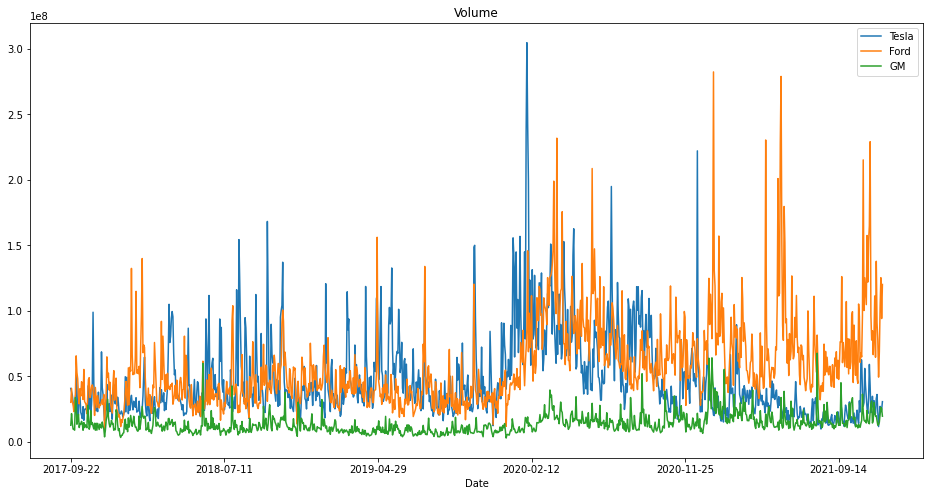

In [ ]:
#Daily Volume
stock_data['Tesla Volume'].plot(label = 'Tesla', figsize = (16,8), title = 'Volume')
stock_data['Ford Volume'].plot(label = 'Ford')
stock_data['GM Volume'].plot(label = 'GM')
plt.legend();

### Finding the dates of maximum trading volumes for each stock

In [ ]:
stock_data[stock_data['Tesla Volume'] == stock_data['Tesla Volume'].max()][['Tesla Volume']]

,Tesla Volume
Date,
2020-02-04,304694000


In [ ]:
stock_data[stock_data['Ford Volume'] == stock_data['Ford Volume'].max()][['Ford Volume']]

,Ford Volume
Date,
2021-01-21,282394100


In [ ]:
stock_data[stock_data['GM Volume'] == stock_data['GM Volume'].max()][[ 'GM Volume']]

,GM Volume
Date,
2021-08-04,67667200


In [ ]:
#Dollars traded for the day
stock_data['Tesla Total Traded'] = stock_data['Tesla Open'] * stock_data['Tesla Volume']
stock_data['Ford Total Traded'] = stock_data['Ford Open'] * stock_data['Ford Volume']
stock_data['GM Total Traded'] = stock_data['GM Open'] * stock_data['GM Volume']

Text(0, 0.5, 'Total Traded')

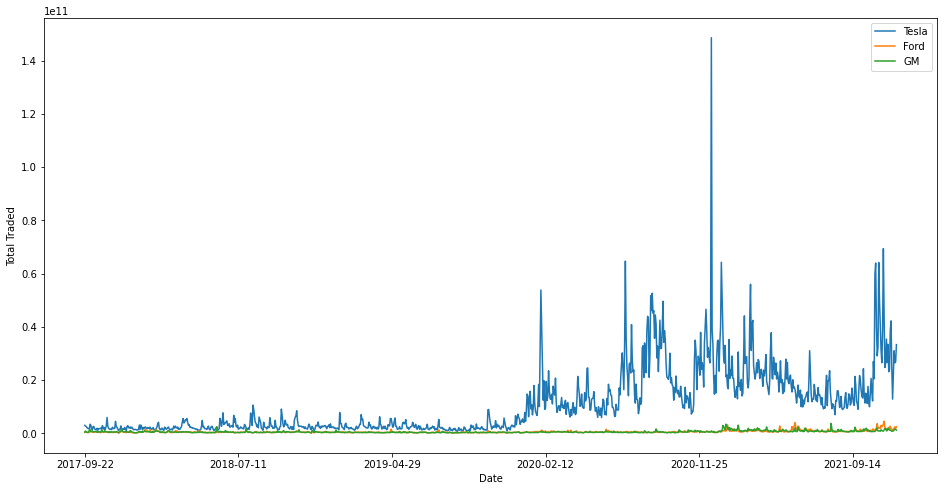

In [ ]:
stock_data['Tesla Total Traded'].plot(label = 'Tesla', figsize = (16,8))
stock_data['Ford Total Traded'].plot(label = 'Ford')
stock_data['GM Total Traded'].plot(label = 'GM')
plt.legend()
plt.ylabel('Total Traded')

In [ ]:
stock_data[stock_data['Tesla Total Traded'] == stock_data['Tesla Total Traded'].max()][[ 'Tesla Total Traded']]

,Tesla Total Traded
Date,
2020-12-18,1.485802e+11


In [ ]:
stock_data[stock_data['Ford Total Traded'] == stock_data['Ford Total Traded'].max()][[ 'Ford Total Traded']]

,Ford Total Traded
Date,
2021-11-10,4.554699e+09


In [ ]:
stock_data[stock_data['GM Total Traded'] == stock_data['GM Total Traded'].max()][[ 'GM Total Traded']]

,GM Total Traded
Date,
2021-08-04,3.737259e+09


Here in the volumes traded for all of the three companies we can see a lot of co-relation between them. We can see that the volumes of all the three stocks are moving together. There are surely some outliers which can be characterized by other factors that just affect an individual company and not the industry as a whole. Another important thing here is we have to look at the volumes on a relative scale and not an absolute scale because volumes are often characterized by the price of the stock. So instead of looking at the total traded charted we will look at the volume traded chart, where we will be able to see more co-relation compared to the Total Traded chart because here we see the number of stocks traded and not the amount traded, so it is less influenced by the market capitalization and price of the share and more by the actual volume. So on a relative scale we can see significant relation in the trading volumes, so we can infer from this that if we see the volumes of some of the auto stocks going up, we can get into the stocks that have not already seen the movement and trade them because in most cases the prices of the industry move as a whole and not as different entities but as a whole industry. Even if we look at the figures for maximum traded amount tesla is almost 100 times more than GM and Ford because of the Market Capitalization difference. Hence, we used actual volume of stocks traded for our analysis.

## Creating Candlestick Charts for Tesla, Ford and GM

### Tesla

In [ ]:
# Plotting interactive candlestick chart for Tesla
fig1 = go.Figure(data=[go.Candlestick(x=stock_data.index,
                open=stock_data['Tesla Open'], high= stock_data['Tesla High'],
                low=stock_data['Tesla Low'], close=stock_data['Tesla Close'])
                     ])

fig1.update_layout(xaxis_rangeslider_visible=False)
fig1.show()



### Ford

In [ ]:
# Plotting interactive candlestick chart for Ford
fig2 = go.Figure(data=[go.Candlestick(x=stock_data.index,
                open=stock_data['Ford Open'], high= stock_data['Ford High'],
                low=stock_data['Ford Low'], close=stock_data['Ford Close'])
                     ])

fig2.update_layout(xaxis_rangeslider_visible=False)
fig2.show()

### GM

In [ ]:
# Plotting interactive candlestick chart for GM
fig3 = go.Figure(data=[go.Candlestick(x=stock_data.index,
                open=stock_data['GM Open'], high= stock_data['GM High'],
                low=stock_data['GM Low'], close=stock_data['GM Close'])
                     ])

fig3.update_layout(xaxis_rangeslider_visible=False)
fig3.show()

The candlestick charts help us visualize the pattern in the price movement for all the three stocks.

Here we can see that again over the past 5 years Tesla has had insanely good price movements compared to Ford and GM.

We can also see that in all the three candlestick charts there is a sharp decline in 2020 in the March and April months. That is around the same time when COVID happened for the first time and all the economies of the world were going down.

We can relate that drop of all the three companies to the happening and spreading of COVID. 

There were lockdowns everywhere, so people did not go out more often. People were not allowed to travel a lot so they would not even go on vacations. This means that there would be very less car sales and very less car rentals as well. 

Now, if COVID were to stay around for a year, the investors could not take that loss because all the three companies had a zero or negative balance sheet for a lot of quarters in 2020. 

Using this information and analysis we can know that , if there is another pandemic ever( god forbid) that the automobile sector is always going to suffer and it is better to get out of it as soon as possible. This theory is justfied by the price movements seen in the candlestick chart.

## Creating Scatter Matrix Plot for the closing values of Tesla, Ford and GM

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
# Concating datasets for creating scatter plots
car_comp = pd.concat([Tesla_stock_data['Tesla Close'], Ford_stock_data['Ford Close'], GM_stock_data['GM Close']], axis = 1)
car_comp.columns = ['Tesla Close', 'Ford Close', 'GM Close']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f020a482990>,
      dtype=object)

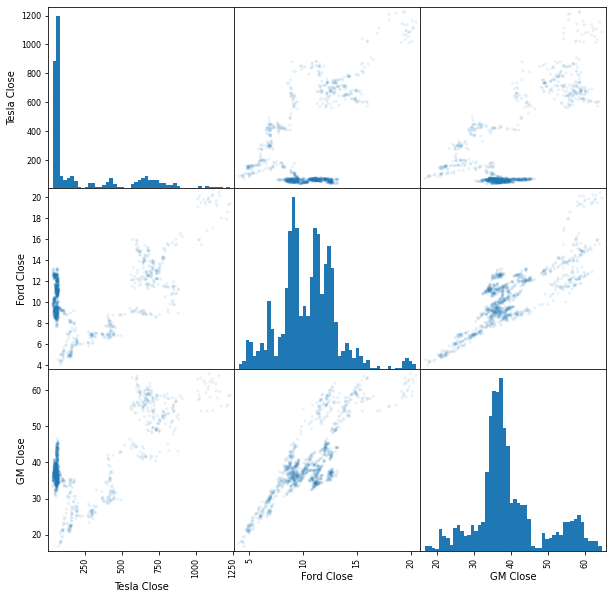

In [ ]:
# Plotting a scatter matrix for better visualization
scatter_matrix(car_comp, figsize=(10,10), alpha=0.1, hist_kwds={'bins':50})

Scatter matrix plot is a good way to visualize bivariate relationships between several different combinations of variables. Each sactter plot in the matrix shows the relationship between a pair of variables. In a scatter plot, we want to know if there is some kind of linear or nonlinear relationship between a pair of variables. Thus, we can observe the relationships between several variables at on time.

From the scatter matrix plot above, we notice that Ford and GM might have some positive relationship. When the close price of Ford increase, the close price of FM seems to increase as well.

Ford and GM are the two biggest automakers in the United States. Both of them have gone through the credit crisis of 2008 but fought their way back to the market and have achieved remarkable revenue growth since then. In the past few years, they both were working on improving the fuel efficiency of their car to keep their products popular among customers. Moreover, they were following the movement toward all-electric vehicles. Their marketing strategy seemed to have some similarity. Therefore, their stock price relationship might have positive relationship.

To sum up, although the daily close price of Ford and GM seems to have some positive relationship, we might need to do some more research or analysis on them to find out the reason of the positive relashiption between them.

## Creating Boxplots for returns of Tesla, Ford and GM



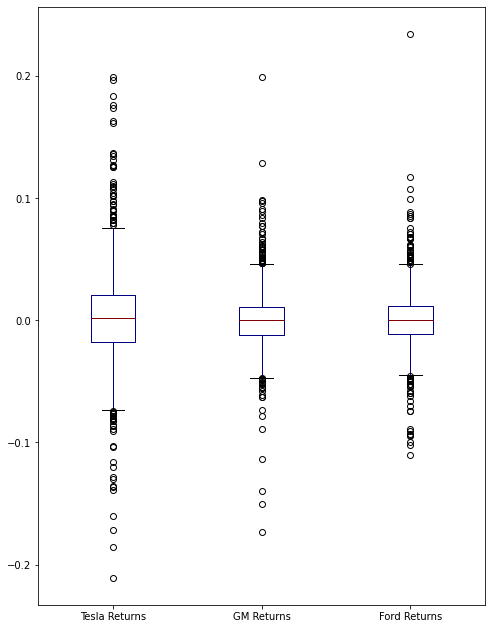

In [ ]:
# Plotting boxplots of Tesla,Ford and GM next to each other for comparision
box_df=pd.concat([stock_data['Tesla %_Change'],stock_data['GM %_Change'],stock_data['Ford %_Change']], axis=1)
box_df.columns=['Tesla Returns','GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11), colormap='jet');

Box plot is a good way to visualize differences among different groups. Also, we can have a quick overview about the median, first quartile(Q1), third quartile(Q3) and outliers. In a box plot, we define the Interquartile Range(IQR) as the middle 50% area of the data, which is calculate by Q3 - Q1. Then we set the maximum and the minumum points to Q1(Q3) ± 1.5 * IQR. Then whatever are located outside the range are consider outliers.

From the box plot above, we can see that Tesla has the largest IQR and largest difference between the maximum and minumum points. As we are comparing the returns in this case, we can say that Tesla's returns are more dispersed or varies the most among the three companies. In other words, Tesla's daily close price are changing with a larger scope which leads to a higher percentage change.

However, the box plots of GM and Ford seems to be a little bit similar compare to Tesla's one. The main difference between GM and Ford is that GM has a more dispersed returns then Ford. As we can see from the Adjusted Close Price comparison plot between the three companies above, we can see that the price change scope for GM is slighty larger than Ford.

To conclude, according to the the box plot analysis, we learn that Tesla's returns are the most dispersed one, follow by GM and then Ford. A more dispersed returns means that the company's close price is changing with a larger scope than others.

It also looks like Ford and GM have some sort of relationship, so let's plot these two in a scatter plot

## Relation between Ford and GM

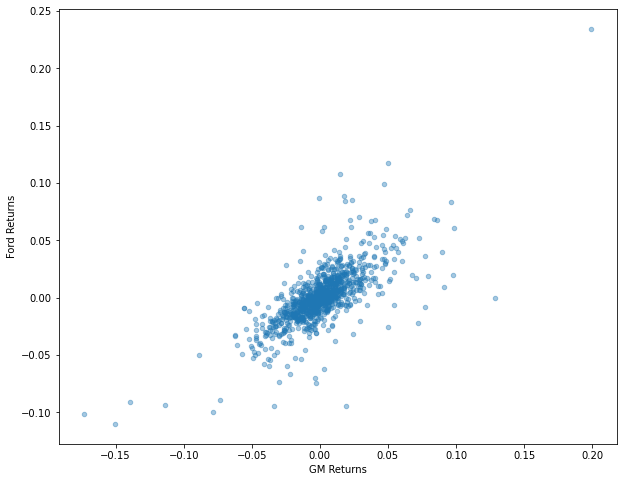

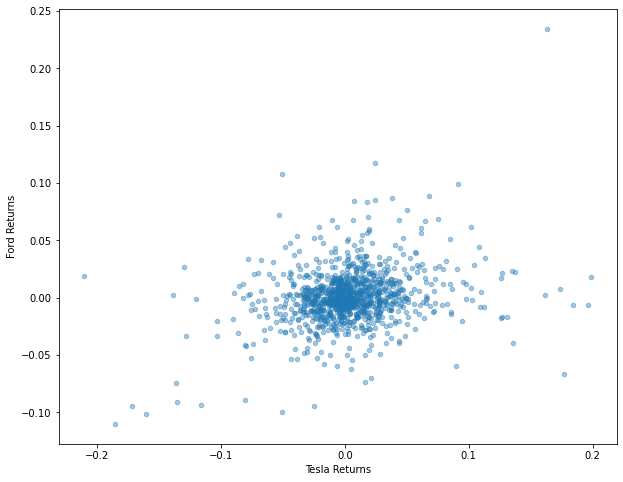

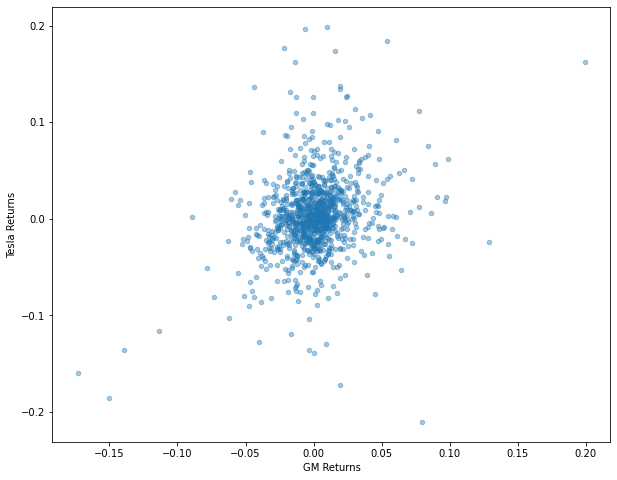

In [ ]:
# Plotting scatter plots of daily returns to find similarities.

box_df.plot(kind="scatter", x="GM Returns",y="Ford Returns", alpha = 0.4, figsize = (10,8))
box_df.plot(kind="scatter", x="Tesla Returns",y="Ford Returns", alpha = 0.4, figsize = (10,8))
box_df.plot(kind="scatter", x="GM Returns",y="Tesla Returns", alpha = 0.4, figsize = (10,8))

As we can see there is a lot of relation between the daily returns of GM and Ford, so the returns of one of the companies can be used to predict the returns of the other company. The relation also justifies the fact that slowly and gradually we are seeing a split in the auto industry, that is Traditional Gas Powered Car manufactureres and EV manufacturers such as Tesla. GM and Ford both originally being in the business of developing cars that run on gas since a lot of decades, we can see better corelation between these companies compared to their relation with a EV company like Tesla.

Looking at the scatter plots between the daily returns of Tesla with Ford and GM we can see that they are not as densely packed as GM and Ford. Ofcourse, there is some relation because at the end of the day they are all auto manufacturers and will have some similarities, but the intensity of that is maximum for GM and Ford.

## Conclusion

We set out to make a codebase that helps financial analysts whether technical or fundamental to find similarities between companies and act on the price movements or similar companies to trade other companies in the same industries. We took the Auto Industry as an example and tried to find co-relations between them and were able to actually find a lot of them, at the same time we also discovered how there are two trends going on in the industry and looking closely at the visualizations we found out that we can actually make out what those trends are by looking at our plots and relating them to the news. This same project is made to work for any three stocks from any industry. In the future, we look forward to use NLP to link news articles and tweets with the stock prices as well as try to recongnize various patterns such as **Inverted Head and Shoulder, Three Black Crows, Three White Soilders etc.** because that will really put this project over the edge. This project while can be actually used to actual trading is not meant for financial investment advice and just meant for study and research purposes.